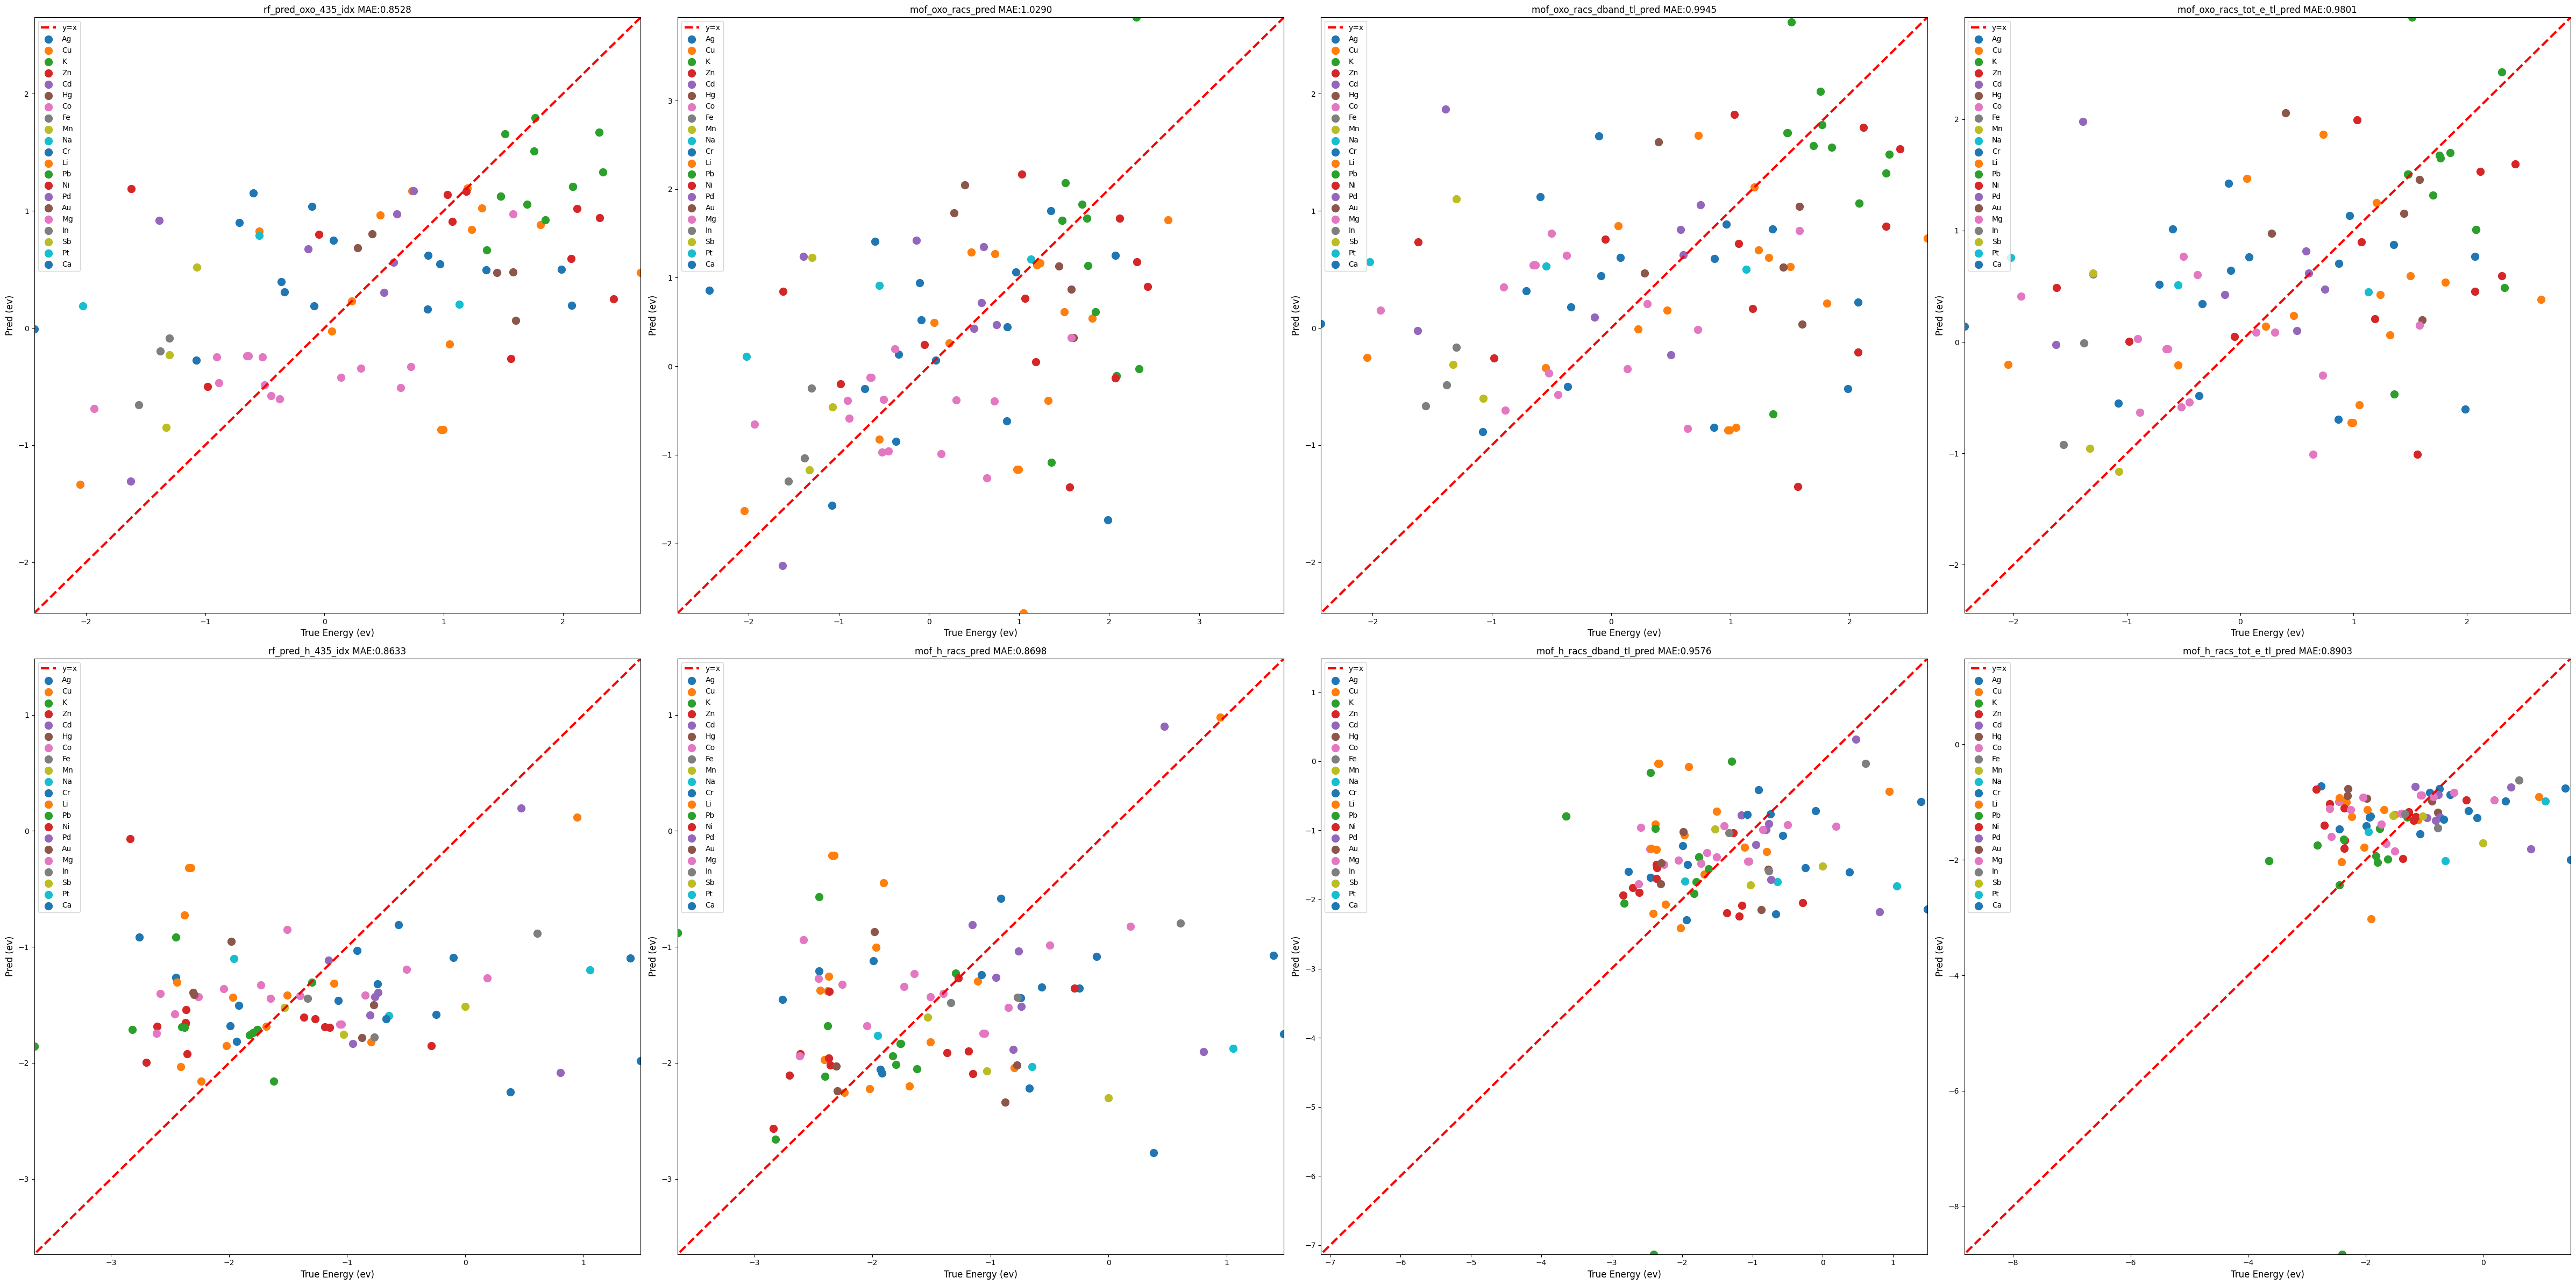

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error
import colorlover as cl

# Create a figure with 4x4 subplots
props = ['oxo','h']
# columns = ["rf", "align-raw", "nn", "align-tl"]

n_rows = 1



src_file_path = "./labels/qmofruns_2_suffled.csv"
df_source = pd.read_csv(src_file_path, index_col = 0)
df_source['ids'] = df_source['MOF'] +'.cif_'+ df_source['Site'].astype(str)
df_source = df_source.drop_duplicates(subset = 'ids')

n = 4

# Example data for each subplot
fig, axes = plt.subplots(len(props), n, figsize=(12 * n, 12 * len(props)))
for k, prop in enumerate(props):
    rf_racs = f"./output/rf_pred_{prop}_435_idx.csv"
    nn_racs_only = f"/scratch/yll6162/CrossPropertyTL/pred/mof_{prop}_racs_pred.csv"
    nn_racs_dband = f"/scratch/yll6162/CrossPropertyTL/pred/mof_{prop}_racs_dband_tl_pred.csv"
    nn_racs_tot_e = f"/scratch/yll6162/CrossPropertyTL/pred/mof_{prop}_racs_tot_e_tl_pred.csv"

    file_paths = [rf_racs, nn_racs_only, nn_racs_dband, nn_racs_tot_e]
    for i, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path, index_col = 0)

        df = df.merge(df_source, how='inner', left_on='ids_test', right_on = 'ids')

        preds = df["predictions"].values
        preds = np.clip(preds, None, 4)
        df['predictions'] = preds
        labels = df["labels"].values
        mae = np.mean(np.absolute(preds - labels))
        
        axes[k][i].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
        metals = df['Metal'].unique()
        axes[k][i].set_xlim(min(min(labels), min(preds)), max(max(labels), max(preds)))
        axes[k][i].set_ylim(min(min(labels), min(preds)), max(max(labels), max(preds)))
        axes[k][i].set_xlabel('True Energy (ev)', fontsize=12)
        axes[k][i].set_ylabel('Pred (ev)', fontsize=12)
        axes[k][i].set_title(f"{file_path.split('/')[-1].rstrip('.csv')} MAE:{mae:.4f}", fontsize=12)
        colormap = cl.to_numeric(cl.scales['12']['qual']['Set3'])
        # colors = [cl.to_numeric(c) for c in colormap]
        for j, metal in enumerate(metals):
            labels = df[df["Metal"] == metal]['labels'].values
            preds = df[df["Metal"] == metal]['predictions'].values
            axes[k][i].scatter(labels, preds, s=100, marker='o', label = metal)


        axes[k][i].legend()
# for i in range(n_rows):
#     for j in range(n_cols):
#         row = rows[i]
#         col = columns[j]
#         axes[i, j].set_title(f'{row}_{col}')
#         filename = "_".join([col.split("_")[0], row, col.split("_")[1], prop]) + '.csv'
#         df = pd.read_csv(os.path.join("pred", filename))
#         preds = df["predictions"].values
#         labels = df["labels"].values
#         axes[i, j].scatter(labels, preds)
#         axes[i, j].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
#         axes[i, j].set_xlim(min(labels), max(labels))
#         axes[i, j].set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

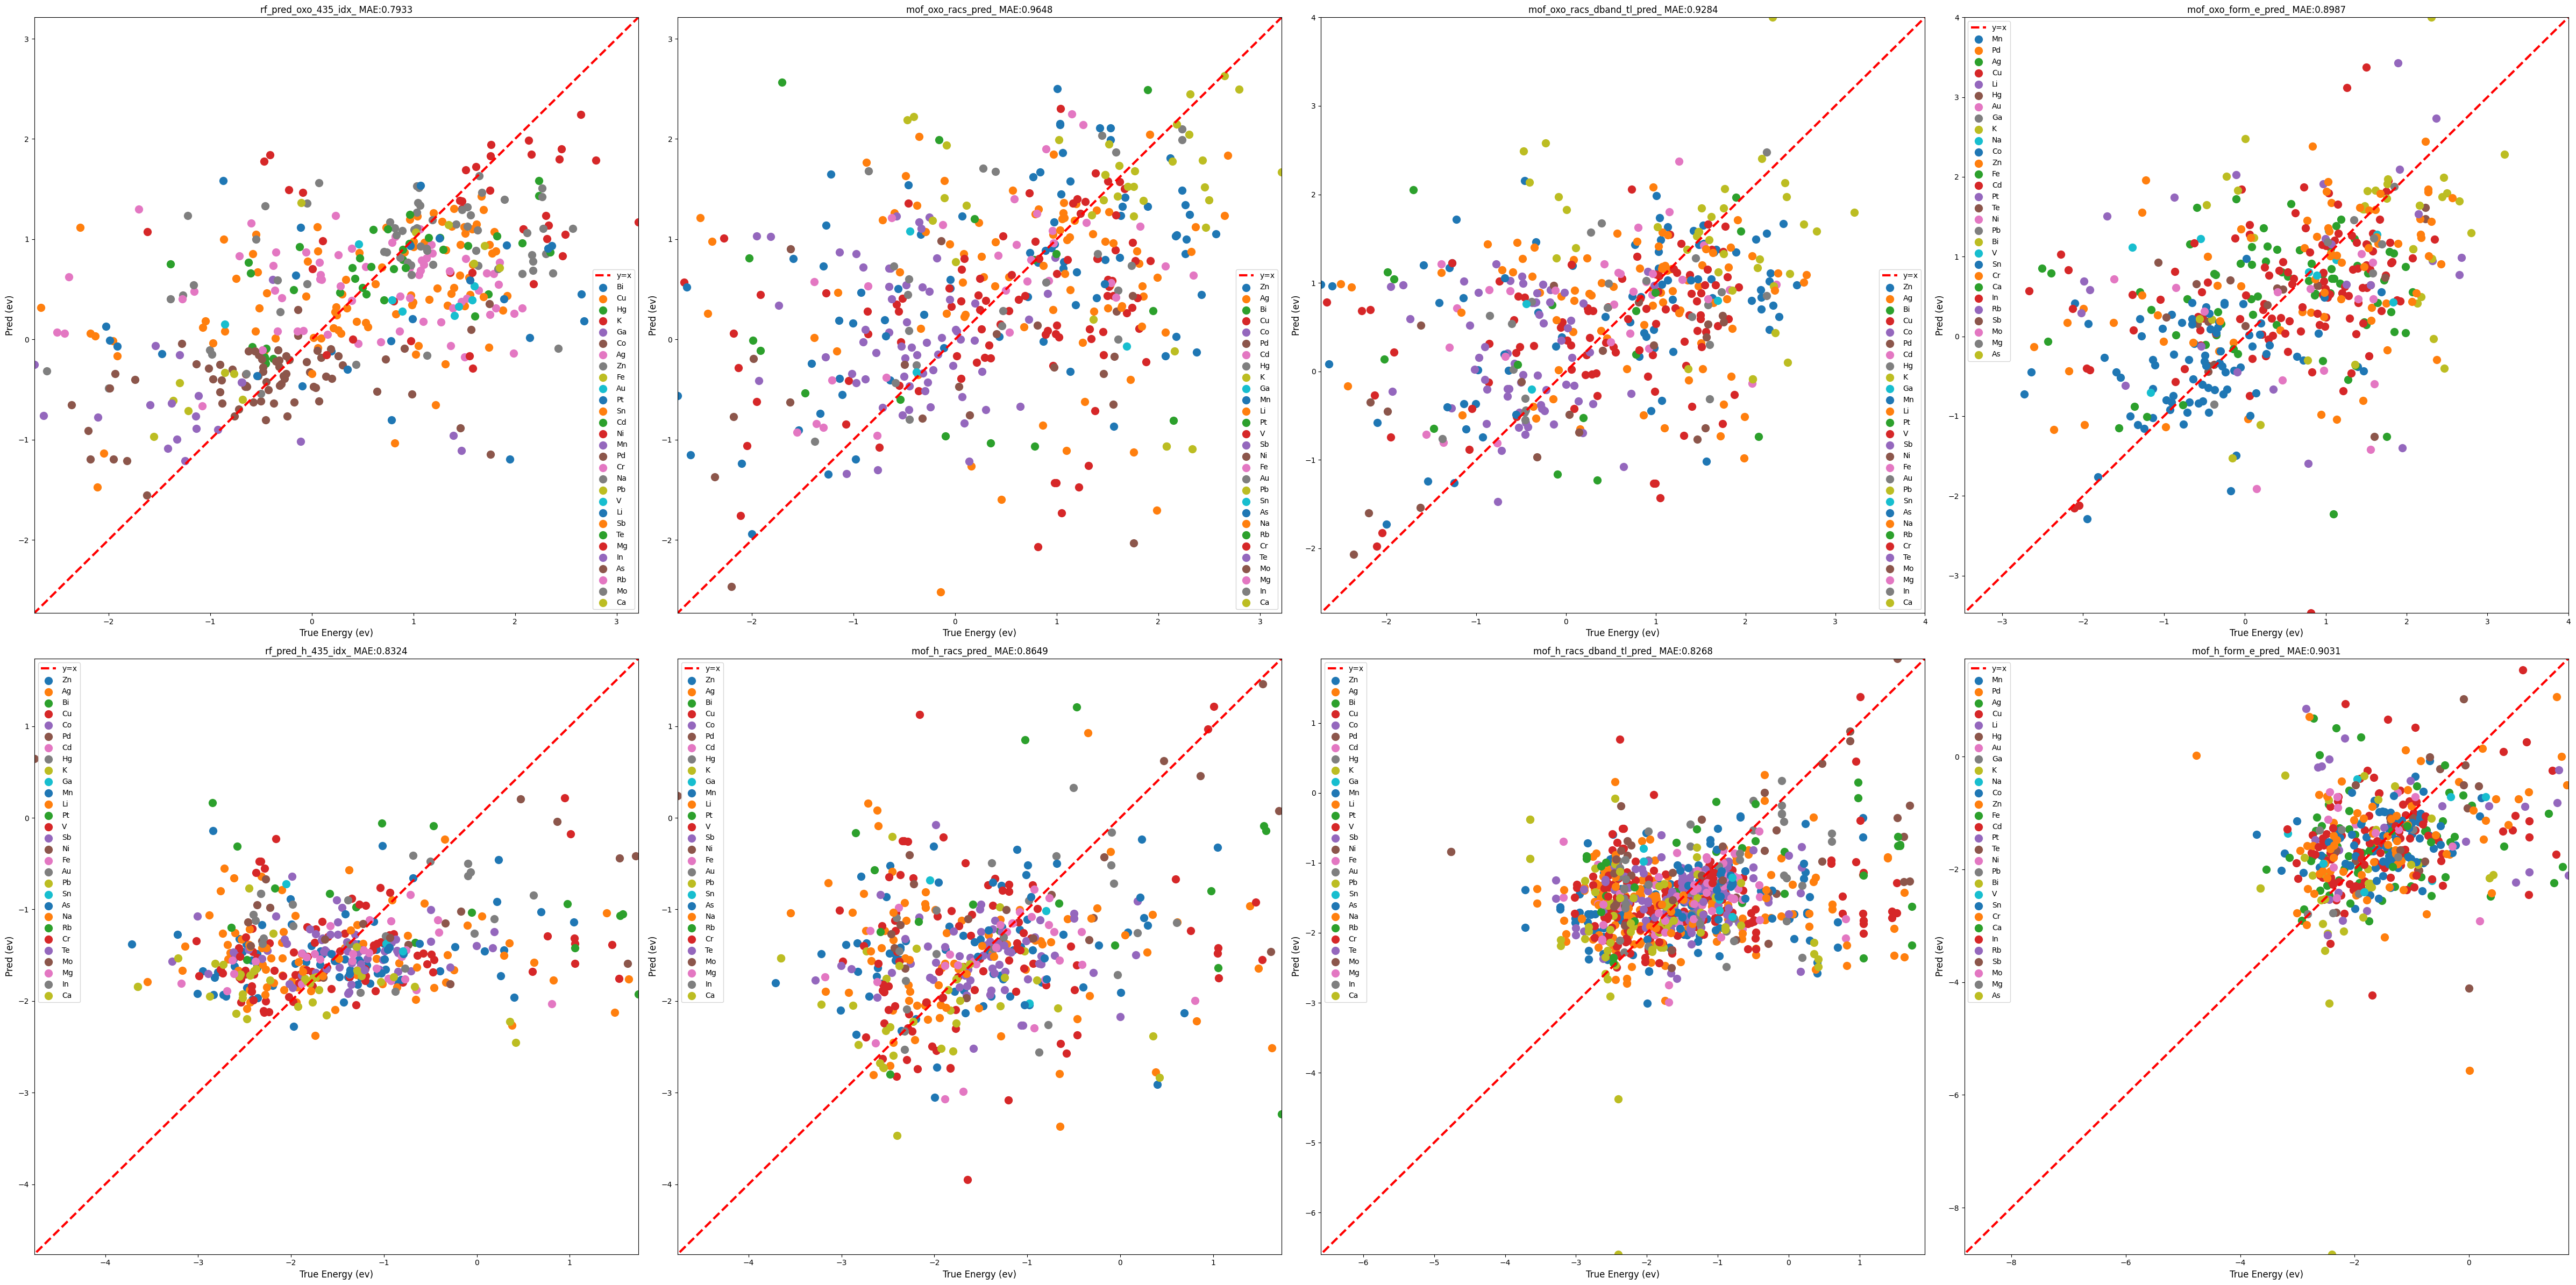

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.metrics import mean_absolute_error
import colorlover as cl

# Create a figure with 4x4 subplots
props = ['oxo','h']
# columns = ["rf", "align-raw", "nn", "align-tl"]

n_rows = 1

n = 4

src_file_path = "./labels/qmofruns_2_suffled.csv"
df_source = pd.read_csv(src_file_path, index_col = 0)
df_source['ids'] = df_source['MOF'] +'.cif_'+ df_source['Site'].astype(str)
df_source = df_source.drop_duplicates(subset = 'ids')

# Example data for each subplot
fig, axes = plt.subplots(len(props), n, figsize=(12 * n, 12 * len(props)))
for k, prop in enumerate(props):
    rf_racs = f"./output/rf_pred_{prop}_435_idx_cv.csv"
    nn_racs_only = f"/scratch/yll6162/CrossPropertyTL/pred/mof_{prop}_racs_pred_cv.csv"
    nn_racs_dband = f"/scratch/yll6162/CrossPropertyTL/pred/mof_{prop}_racs_dband_tl_pred_cv.csv"
    nn_racs_form_e = f"/scratch/yll6162/CrossPropertyTL/pred/mof_{prop}_form_e_pred_cv.csv"

    file_paths = [rf_racs, nn_racs_only, nn_racs_dband, nn_racs_form_e]
    for i, file_path in enumerate(file_paths):
        df = pd.read_csv(file_path, index_col = 0)
        df = df.merge(df_source, how='inner', left_on='ids_test', right_on = 'ids')
        preds = df["predictions"].values
        preds = np.clip(preds, None, 4)
        df['predictions'] = preds
        labels = df["labels"].values
        mae = np.mean(np.absolute(preds - labels))
        
        axes[k][i].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
        metals = df['Metal'].unique()
        axes[k][i].set_xlim(min(min(labels), min(preds)), max(max(labels), max(preds)))
        axes[k][i].set_ylim(min(min(labels), min(preds)), max(max(labels), max(preds)))
        axes[k][i].set_xlabel('True Energy (ev)', fontsize=12)
        axes[k][i].set_ylabel('Pred (ev)', fontsize=12)
        axes[k][i].set_title(f"{file_path.split('/')[-1].rstrip('.csv')} MAE:{mae:.4f}", fontsize=12)
        colormap = cl.to_numeric(cl.scales['12']['qual']['Set3'])
        # colors = [cl.to_numeric(c) for c in colormap]
        for j, metal in enumerate(metals):
            labels = df[df["Metal"] == metal]['labels'].values
            preds = df[df["Metal"] == metal]['predictions'].values
            axes[k][i].scatter(labels, preds, s=100, marker='o', label = metal)


        axes[k][i].legend()
# for i in range(n_rows):
#     for j in range(n_cols):
#         row = rows[i]
#         col = columns[j]
#         axes[i, j].set_title(f'{row}_{col}')
#         filename = "_".join([col.split("_")[0], row, col.split("_")[1], prop]) + '.csv'
#         df = pd.read_csv(os.path.join("pred", filename))
#         preds = df["predictions"].values
#         labels = df["labels"].values
#         axes[i, j].scatter(labels, preds)
#         axes[i, j].plot([-100, 100], [-100, 100], '--r', label='y=x', linewidth=3)
#         axes[i, j].set_xlim(min(labels), max(labels))
#         axes[i, j].set_ylim(min(labels), max(labels))

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

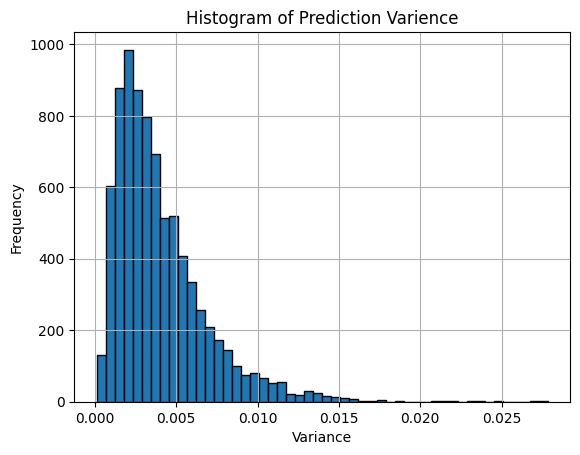

In [13]:
### Histogram of varience
prop = "oxo"
rf_file_path = f"/scratch/yll6162/MOF-oxo/output/rf_pred_{prop}_idx_iter_all_var.csv"
df_var = pd.read_csv(rf_file_path, index_col = 0)
plt.hist(df_var['row_variances'], bins=50, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Variance')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Varience')
plt.grid(True)
plt.show()